In [1]:
# data visualization and utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import graphviz
%matplotlib inline

In [2]:
# classifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import Lasso

In [ ]:
# evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score

In [4]:
# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [5]:
loan = pd.read_csv('kiva_loans.csv')

In [6]:
loan_std = pd.read_csv('kiva_loans_standardized.csv')

In [7]:
selected_features = list(loan_std.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

In [9]:
y = loan['repayment_interval']
X = loan_std[selected_features]

In [11]:
107938

107938

In [10]:
from sklearn.metrics import precision_score

In [14]:
score = []
j = 1
for j in range(1,11):
            
    dtree = DTC(max_depth = j * 10000)

    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    kf = KFold(n_splits=10)
    i = 0

    for train_index, test_index in kf.split(X):    

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtree.fit(X_train,y_train)
        ALL_PRED_LABEL.extend(dtree.predict(X_test))
        ALL_TRUE_LABEL.extend(y_test)

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
    score.append(precision_score(ALL_TRUE_LABEL, ALL_PRED_LABEL, average = 'macro'))
    print('Finish Subset Iteration ',j)
#     print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
#     print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  1
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  2
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  3
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iterati

In [15]:
max_depth = [i * 10000 for i in range(1,11)]
max_depth

[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

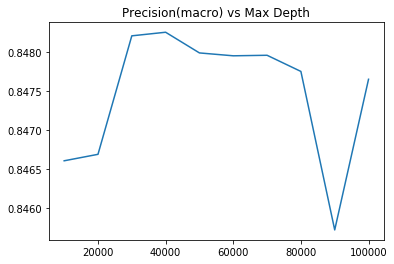

In [17]:
plt.plot(max_depth, score)
# plt.xlabel('Precision(macro)')
# plt.ylabel('Maximum Depth')
plt.title('Precision(macro) vs Max Depth')
plt.show()

In [18]:
dtree = DTC(max_depth = 4 * 10000)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0

for train_index, test_index in kf.split(X):    

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtree.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(dtree.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)

    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1    

print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.84      0.85      0.85     70728
   irregular       0.89      0.91      0.90    257158
     monthly       0.92      0.90      0.91    342717
      weekly       0.73      0.70      0.72       602

   micro avg       0.90      0.90      0.90    671205
   macro avg       0.85      0.84      0.84    671205
weighted avg       0.90      0.90      0.90    671205

[[ 60016   2612   8090     10]
 [  2446 234930  19667    115]
 [  8808  24915 308965     29]
 [     4    148     27    423]]


It proves that 40,000 works well as 100,000+ depth.  

One tiny point is that, although the score are pretty much the same, there are some minor advantage in teh confucsion matrix compairing the both matrix.  In fact there are more correct cases than limiting only 40,000 depth in decision tree.  

Another search for depth limit between 30,000 and 50,000.  

In [19]:
score = []
j = 1
for j in range(30,50):
            
    dtree = DTC(max_depth = j * 1000)

    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    kf = KFold(n_splits=10)
    i = 0

    for train_index, test_index in kf.split(X):    

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtree.fit(X_train,y_train)
        ALL_PRED_LABEL.extend(dtree.predict(X_test))
        ALL_TRUE_LABEL.extend(y_test)

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
    score.append(precision_score(ALL_TRUE_LABEL, ALL_PRED_LABEL, average = 'macro'))
    print('Finish Depth Iteration ',j)
#     print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
#     print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  30
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  31
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  32
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iterati

In [20]:
max_depth = [i * 1000 for i in range(30,50)]
max_depth

[30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000,
 41000,
 42000,
 43000,
 44000,
 45000,
 46000,
 47000,
 48000,
 49000]

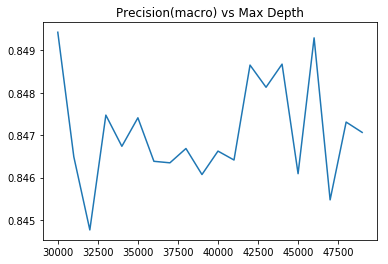

In [21]:
plt.plot(max_depth, score)
# plt.xlabel('Precision(macro)')
# plt.ylabel('Maximum Depth')
plt.title('Precision(macro) vs Max Depth')
plt.show()

In [22]:
dtree = DTC(max_depth = 310000)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0

for train_index, test_index in kf.split(X):    

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtree.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(dtree.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)

    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1    

print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.84      0.85      0.85     70728
   irregular       0.89      0.91      0.90    257158
     monthly       0.92      0.90      0.91    342717
      weekly       0.74      0.71      0.72       602

   micro avg       0.90      0.90      0.90    671205
   macro avg       0.85      0.84      0.85    671205
weighted avg       0.90      0.90      0.90    671205

[[ 59988   2588   8142     10]
 [  2439 234967  19638    114]
 [  8789  24971 308928     29]
 [     4    146     25    427]]


In [23]:
dtree = DTC(max_depth = 46000)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0

for train_index, test_index in kf.split(X):    

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtree.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(dtree.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)

    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1    

print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.84      0.85      0.85     70728
   irregular       0.89      0.91      0.90    257158
     monthly       0.92      0.90      0.91    342717
      weekly       0.73      0.71      0.72       602

   micro avg       0.90      0.90      0.90    671205
   macro avg       0.85      0.84      0.85    671205
weighted avg       0.90      0.90      0.90    671205

[[ 60030   2591   8096     11]
 [  2423 234949  19672    114]
 [  8776  24911 309000     30]
 [     5    145     24    428]]


In [31]:
dtree_vis = DTC(max_depth = 1)
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=46000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
from graphviz import Source
from sklearn import tree

In [32]:
dotfile = open("dtree_vis.dot", 'w')
tree.export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()

In [34]:
1e-7 * 10

1e-06

In [36]:
score = []
impurity = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 0]
j = 1
for j in range(len(impurity)):
            
    dtree = DTC(max_depth = 46000, min_impurity_decrease = impurity[j])

    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    kf = KFold(n_splits=10)
    i = 0

    for train_index, test_index in kf.split(X):    

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtree.fit(X_train,y_train)
        ALL_PRED_LABEL.extend(dtree.predict(X_test))
        ALL_TRUE_LABEL.extend(y_test)

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
    score.append(precision_score(ALL_TRUE_LABEL, ALL_PRED_LABEL, average = 'macro'))
    print('Finish Depth Iteration ',j)
#     print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
#     print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))


Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  0
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  1
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  2
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration 

In [37]:
min_split = ['1e-5', '1e-6', '1e-7', '1e-8', '1e-9', '0']

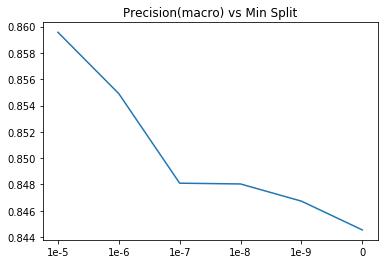

In [38]:
plt.plot(min_split, score)
# plt.xlabel('Precision(macro)')
# plt.ylabel('Maximum Depth')
plt.title('Precision(macro) vs Min Split')
plt.show()

In [39]:
score = []
impurity = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
j = 1
for j in range(len(impurity)):
            
    dtree = DTC(max_depth = 46000, min_impurity_decrease = impurity[j])

    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    kf = KFold(n_splits=10)
    i = 0

    for train_index, test_index in kf.split(X):    

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtree.fit(X_train,y_train)
        ALL_PRED_LABEL.extend(dtree.predict(X_test))
        ALL_TRUE_LABEL.extend(y_test)

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
    score.append(precision_score(ALL_TRUE_LABEL, ALL_PRED_LABEL, average = 'macro'))
    print('Finish Depth Iteration ',j)
#     print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
#     print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))


Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Finish Depth Iteration  0
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Finish Depth Iteration  1
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Finish Depth Iteration  2
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  3
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  4


In [40]:
min_split = ['1e-1', '1e-2', '1e-3', '1e-4', '1e-5']

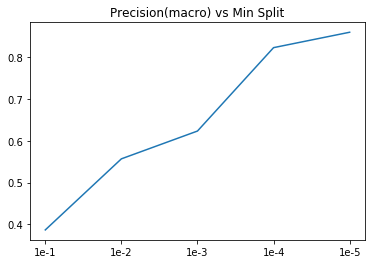

In [41]:
plt.plot(min_split, score)
# plt.xlabel('Precision(macro)')
# plt.ylabel('Maximum Depth')
plt.title('Precision(macro) vs Min Split')
plt.show()

Retest for depth with min_split_decrease = 1e-5.  

In [42]:
score = []
j = 1
for j in range(1,11):
            
    dtree = DTC(max_depth = j * 10000, min_impurity_decrease = 1e-5)

    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    kf = KFold(n_splits=10)
    i = 0

    for train_index, test_index in kf.split(X):    

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtree.fit(X_train,y_train)
        ALL_PRED_LABEL.extend(dtree.predict(X_test))
        ALL_TRUE_LABEL.extend(y_test)

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
    score.append(precision_score(ALL_TRUE_LABEL, ALL_PRED_LABEL, average = 'macro'))
    print('Finish Subset Iteration ',j)
#     print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
#     print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  1
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  2
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  3
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iterati

In [43]:
max_depth = [i * 10000 for i in range(1,11)]
max_depth

[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

In [44]:
# I get smarter.  i want to reproduce the graph again anytime without running all over 1 hour again.  
score

[0.8595655808861964,
 0.8595883384817247,
 0.8595830187671134,
 0.8595805450311882,
 0.8595515873112465,
 0.8596270504197978,
 0.8596170974651811,
 0.8595606872621224,
 0.8596028777388205,
 0.859563973736035]

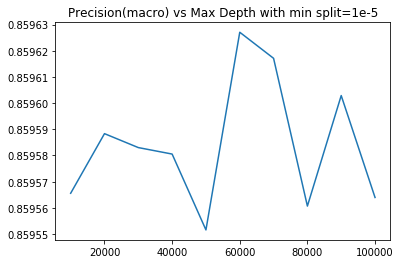

In [46]:
plt.plot(max_depth, score)
# plt.xlabel('Precision(macro)')
# plt.ylabel('Maximum Depth')
plt.title('Precision(macro) vs Max Depth with min split=1e-5')
plt.show()

In [47]:
score = []
j = 1
for j in range(55,65):
            
    dtree = DTC(max_depth = j * 1000)

    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    kf = KFold(n_splits=10)
    i = 0

    for train_index, test_index in kf.split(X):    

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtree.fit(X_train,y_train)
        ALL_PRED_LABEL.extend(dtree.predict(X_test))
        ALL_TRUE_LABEL.extend(y_test)

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
    score.append(precision_score(ALL_TRUE_LABEL, ALL_PRED_LABEL, average = 'macro'))
    print('Finish Depth Iteration ',j)
#     print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
#     print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  55
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  56
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Depth Iteration  57
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iterati

In [48]:
max_depth = [i * 10000 for i in range(55,65)]
max_depth

[550000,
 560000,
 570000,
 580000,
 590000,
 600000,
 610000,
 620000,
 630000,
 640000]

In [49]:
score

[0.8466404968352742,
 0.8465867349226112,
 0.8457345214747769,
 0.847100031721099,
 0.8471999017673282,
 0.847306793687157,
 0.848592940699122,
 0.8465217209153013,
 0.8472588465179925,
 0.8481486374340961]

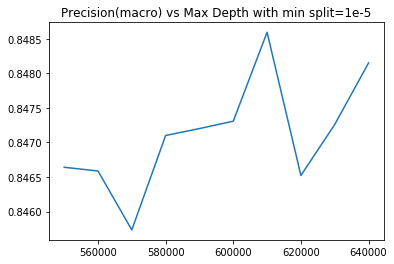

In [50]:
plt.plot(max_depth, score)
# plt.xlabel('Precision(macro)')
# plt.ylabel('Maximum Depth')
plt.title('Precision(macro) vs Max Depth with min split=1e-5')
plt.show()

In [52]:
dtree = DTC(max_depth = 61000, min_impurity_decrease = 1e-5)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0

    for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtree.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(dtree.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)

    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1    

print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.85      0.88      0.86     70728
   irregular       0.92      0.92      0.92    257158
     monthly       0.93      0.92      0.92    342717
      weekly       0.74      0.84      0.79       602

   micro avg       0.92      0.92      0.92    671205
   macro avg       0.86      0.89      0.87    671205
weighted avg       0.92      0.92      0.92    671205

[[ 61996   1683   7034     15]
 [  2526 236842  17638    152]
 [  8158  19401 315147     11]
 [     5     65     25    507]]


In [53]:
dtree = DTC(max_depth = 61000, min_impurity_decrease = 1e-5)

In [54]:
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=61000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-05, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
from graphviz import Source
from sklearn.tree import export_graphviz

In [56]:
dotfile = open("dtree4.dot", 'w')
export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()

In [58]:
loan_encoded = pd.read_csv('kiva_loans_dummied.csv')

In [59]:
selected_features = list(loan_encoded.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

In [61]:
X_encoded = loan_encoded[selected_features]

In [64]:
dtree = DTC(max_depth = 61000, min_impurity_decrease = 1e-5)
dtree.fit(X_encoded,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=61000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-05, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
dotfile = open("dtree4.dot", 'w')
export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()